In [7]:
from pathlib import Path
import matplotlib as mpl
from flow_analysis_comps.data_structs.kymographs import kymoExtractConfig, GSTConfig

import matplotlib.pyplot as plt
import colorcet  # noqa: F401
from flow_analysis_comps.processing.kymographing.kymographer import KymographExtractor
from flow_analysis_comps.visualizing.kymographs import kymoVisualizer
from flow_analysis_comps.visualizing.GSTSpeeds import GSTSpeedVizualizer
from flow_analysis_comps.processing.GSTSpeedExtract.extract_velocity import kymoAnalyser
from flow_analysis_comps.data_structs.kymographs import graphExtractConfig
from flow_analysis_comps.processing.graph_extraction.graph_extract import VideoGraphExtractor
from flow_analysis_comps.visualizing.GraphVisualize import GraphVisualizer

plt.close("all")

%matplotlib widget

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
video_root_folder = Path(
    # r"/Users/simonvanstaalduine/AMOLF-SHIMIZU Dropbox/Simon van Staalduine/034"
    r"G:\AMOLF_Data\AMOLF-SHIMIZU Dropbox\Simon van Staalduine\033"
)
graph_data = VideoGraphExtractor(video_root_folder, graphExtractConfig()).edge_data
kymograph_list = KymographExtractor(graph_data, kymoExtractConfig()).processed_kymographs
speed_obj = kymoAnalyser(kymograph_list[0], GSTConfig()).output_speeds()

[2025-05-26 23:10:29] INFO flow_analysis_comps.kymographer: Extracted edge coordinates from G:\AMOLF_Data\AMOLF-SHIMIZU Dropbox\Simon van Staalduine\034


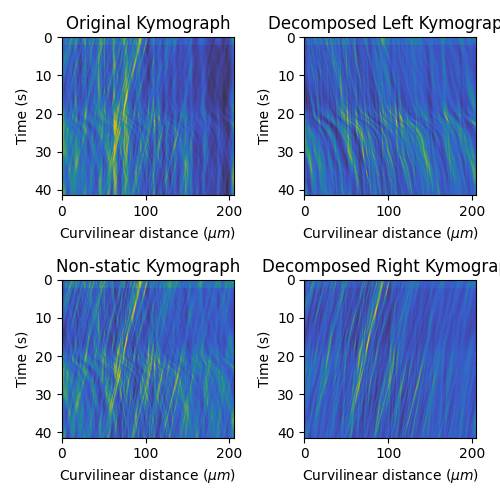

F:\AMOLF_PhD_repos\flow_analysis_comps\flow_analysis_comps\visualizing\GSTSpeeds.py:84: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


(<Figure size 640x480 with 3 Axes>,
 {'kymograph': <Axes: label='kymograph', title={'center': 'kymograph'}, xlabel='Curvilinear distance ($\\mu m$)', ylabel='time (s)'>,
  'temporal histogram': <Axes: label='temporal histogram', title={'center': 'temporal histogram'}, xlabel='time (s)', ylabel='Speed ($\\mu m / s$)'>,
  'speed plot': <Axes: label='speed plot', title={'center': 'speed plot'}, xlabel='time (s)', ylabel='Speed ($\\mu m / s$)'>})

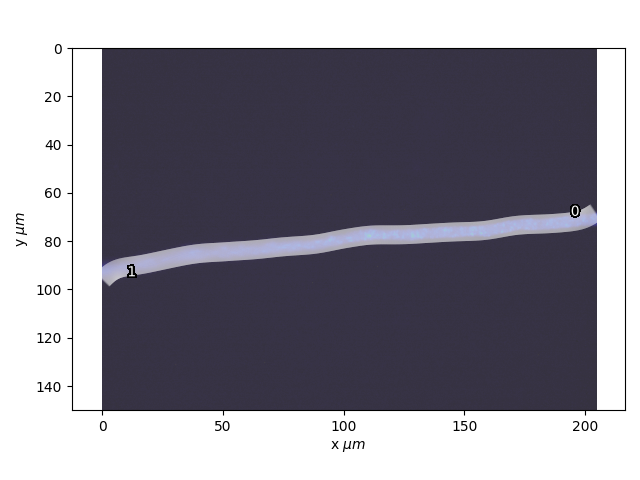

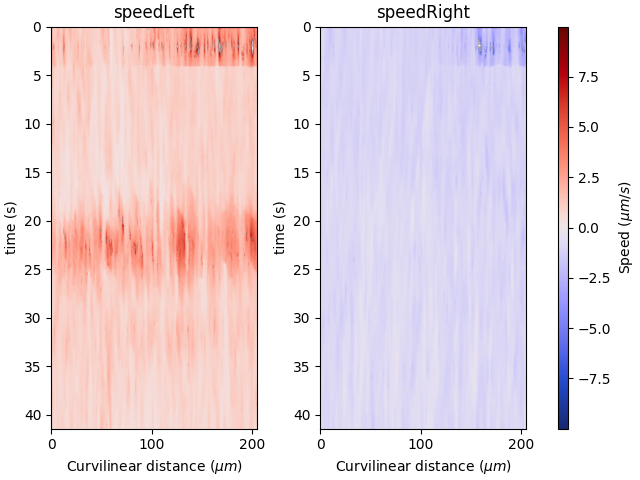

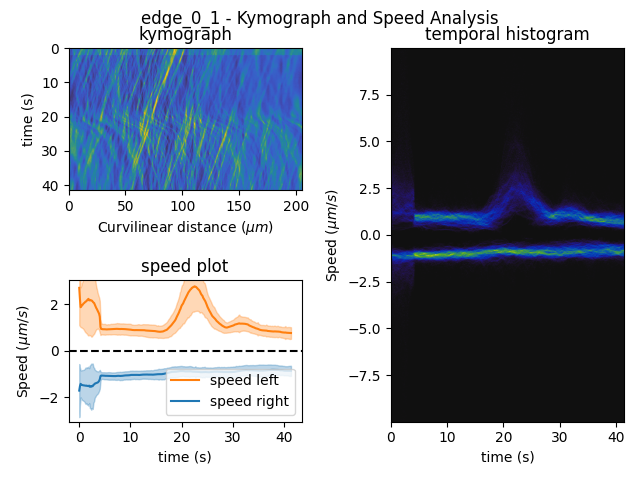

In [9]:
GraphVisualizer(graph_data).plot_extraction()
kymoVisualizer(kymograph_list[0]).plot()
GSTSpeedVizualizer(speed_obj).show_speed_fields()
GSTSpeedVizualizer(speed_obj).plot_summary(kymograph_list[0])